 --- 
# UCI - Default from Credit Card Clients
---

# Dataset presentation

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

It can be found here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


In [1]:
    # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# Any results you write to the current directory are saved as output.

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\nfor filename in filenames:\n    print(os.path.join(dirname, filename))\n"

In [2]:
root = Path('.')
df = pd.read_csv(root / 'UCI_Credit_Card.csv')

# Useful imports

## Packages

In [3]:
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', 999)

## Model imports

## Metrics imports

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Initial Data Exploration

In [6]:
df.shape

(30000, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [8]:
df.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


## Statistical description

In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Missing values

Any missing values?

In [10]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No, we're good!

## Copy without ID

In [11]:
df_original = df.copy()

In [12]:
df = df.drop(columns='ID')

In [13]:
list(df.columns)[:5]

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

# Data cleaning

## Renaming columns

### Setting same template for all column names

In [14]:
df = df.rename(columns = {'PAY_0':'PAY_1', 
                          'default.payment.next.month': 'default',
                         'SEX':'GENDER'})

Let's capitalize all column names

Let's extract column names first

### Lowercase column names

In [15]:
colonnes = list(df.columns)

In [16]:
renaming_dict = {}
new_colonnes = []
for colonne in colonnes:
    new_colonne = colonne.lower()
    renaming_dict[colonne] = new_colonne
    new_colonnes.append(new_colonne)

In [17]:
new_colonnes[:5]

['limit_bal', 'gender', 'education', 'marriage', 'age']

In [18]:
df = df.rename(columns=renaming_dict)

### Defining our column names list

In [19]:
colonnes = new_colonnes.copy()

In [20]:
colonnes[:5]

['limit_bal', 'gender', 'education', 'marriage', 'age']

In [21]:
df.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Cleaning the pay_n data

Let's change the pay_n data, so that it is either 0 or 1:
* 0: there was no default
* 1: Default !

We could also try to predict our outcomes only by using the 1 or 2 previous months, so that we can have much more validation data !

This way, we could predict pay_1 using pay_2 and pay_3

In [22]:
df.pay_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pay_1, dtype: int64

In [23]:
pay_columns = ['pay_'+str(i) for i in range(1,7)]
pay_columns

['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [24]:
for pay_col in pay_columns:
    df.loc[df[pay_col] >0, pay_col] = 1
    df.loc[df[pay_col] <= 0, pay_col] = 0

In [25]:
df.pay_1.value_counts()

0    23182
1     6818
Name: pay_1, dtype: int64

# Back to Data Exploration

## Data repartition among the 2 classes

In [26]:
df.groupby('default').size()

default
0    23364
1     6636
dtype: int64

In [27]:
print("Default percentage: {} %".format(df[df['default']==1].shape[0] / df.shape[0] * 100) )

Default percentage: 22.12 %


## Our categorical variables

In [28]:
df.describe()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.227267,0.147933,0.140433,0.117000,0.098933,0.102633,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.419073,0.355040,0.347442,0.321426,0.298577,0.303484,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [29]:
df.sample(20)

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
6494,180000.0,2,2,2,35,0,0,0,0,0,0,-117.0,2573.0,-77.0,-77.0,1823.0,227.0,2690.0,0.0,0.0,1900.0,230.0,0.0,0
22814,50000.0,2,2,3,44,0,0,0,0,0,0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,0
17339,30000.0,2,3,2,31,0,0,0,1,1,0,26667.0,27675.0,30611.0,30647.0,28245.0,24357.0,1455.0,3391.0,949.0,0.0,745.0,584.0,0
12061,500000.0,1,1,1,36,0,0,0,0,0,0,396.0,1043.0,19230.0,116696.0,194483.0,195454.0,1043.0,19230.0,100062.0,94503.0,10000.0,40000.0,0
19517,540000.0,2,1,2,34,0,0,0,0,0,0,1128.0,1784.0,892.0,946.0,946.0,946.0,1784.0,892.0,1000.0,946.0,946.0,946.0,0
5019,20000.0,1,3,2,48,1,1,1,0,0,0,16434.0,17452.0,16879.0,17059.0,17263.0,17675.0,1577.0,0.0,757.0,628.0,700.0,2488.0,0
15423,20000.0,1,2,2,24,0,0,1,0,0,0,15886.0,16337.0,16470.0,10195.0,11195.0,11995.0,2500.0,800.0,1500.0,1000.0,800.0,6720.0,0
26886,330000.0,1,3,1,39,0,0,0,0,0,0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,0
23573,300000.0,2,2,1,39,0,0,0,0,0,0,2022.0,537.0,142.0,656.0,620.0,502.0,537.0,142.0,656.0,620.0,502.0,142.0,0
3597,50000.0,2,2,1,37,1,1,1,0,0,0,40994.0,43594.0,38222.0,13026.0,13268.0,13497.0,5500.0,0.0,580.0,600.0,600.0,600.0,0


Our Categorical data are 'gender', 'education', 'marriage'

In [30]:
df.gender.value_counts()

2    18112
1    11888
Name: gender, dtype: int64

In [31]:
df.education.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

### On plot tout ça

#### Education

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [32]:
df.default.describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64

In [33]:
df[df['default']==3]

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default


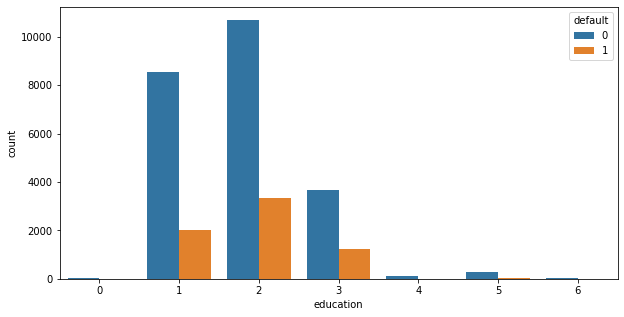

In [34]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="education", hue="default", data=df)

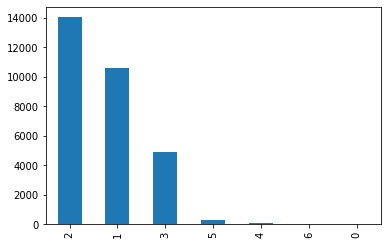

In [35]:
df.education.value_counts().plot(kind='bar')

Bizarre...
On regroupe tout ça (les catégories autres: 0,4,5,6) dans 4

In [36]:
df[df['education'].isin([0,4,5,6])][:5]

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
47,150000.0,2,5,2,46,0,0,0,0,0,0,4463.0,3034.0,1170.0,1170.0,0.0,0.0,1013.0,1170.0,0.0,0.0,0.0,0.0,1
69,20000.0,1,5,2,22,1,0,0,0,0,0,18565.0,17204.0,17285.0,18085.0,11205.0,5982.0,0.0,1200.0,1000.0,500.0,1000.0,0.0,0
358,110000.0,2,4,2,24,0,0,0,0,0,0,83755.0,77431.0,79044.0,80631.0,82333.0,84462.0,3000.0,2900.0,2900.0,3000.0,3500.0,4000.0,0
385,410000.0,2,5,1,42,0,0,0,0,0,0,338106.0,342904.0,344464.0,240865.0,234939.0,240176.0,15000.0,14000.0,9000.0,8500.0,9000.0,8300.0,0
448,200000.0,1,4,1,42,0,0,0,0,0,0,38564.0,38246.0,32253.0,30384.0,30900.0,0.0,5000.0,1485.0,1956.0,1500.0,0.0,2102.0,0


In [37]:
df.loc[df['education'].isin([0,4,5,6]), 'education'] = 4

In [38]:
df['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

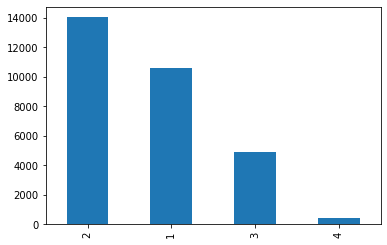

In [39]:
df['education'].value_counts().plot(kind='bar')

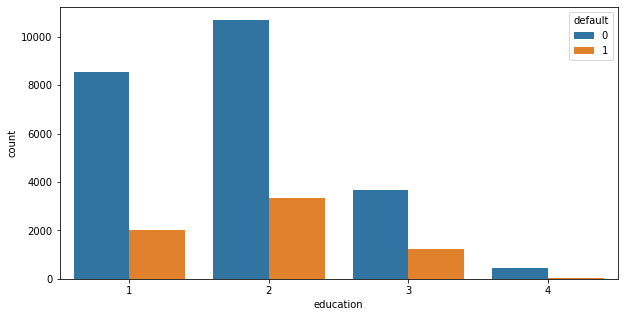

In [40]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="education", hue="default", data=df)

#### Marriage
 MARRIAGE: Marital status (1=married, 2=single, 3=others)

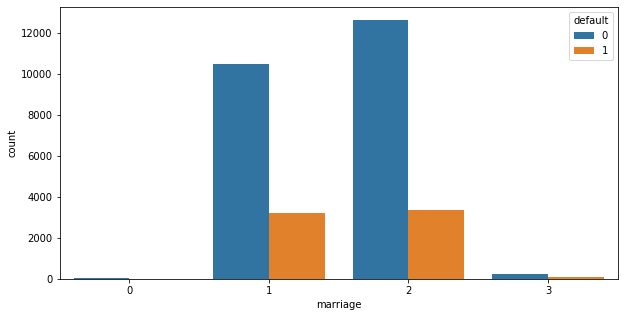

In [41]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="marriage", hue="default", data=df)

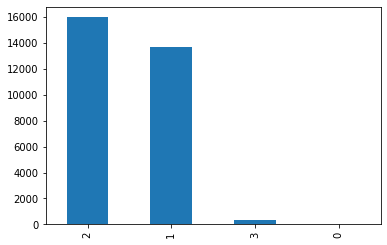

In [42]:
df.marriage.value_counts().plot(kind='bar')

Idem pour 'marriage': (0,3) -> 3

In [43]:
df.marriage.value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

In [44]:
df.loc[df['marriage'].isin([0,3,4]), 'marriage'] = 3
df['marriage'].value_counts()

2    15964
1    13659
3      377
Name: marriage, dtype: int64

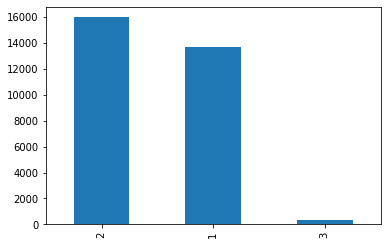

In [45]:
df.marriage.value_counts().plot(kind='bar')

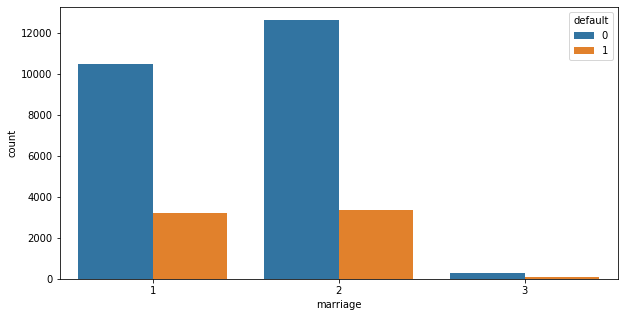

In [46]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="marriage", hue="default", data=df)

## Our other variables

C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


[]

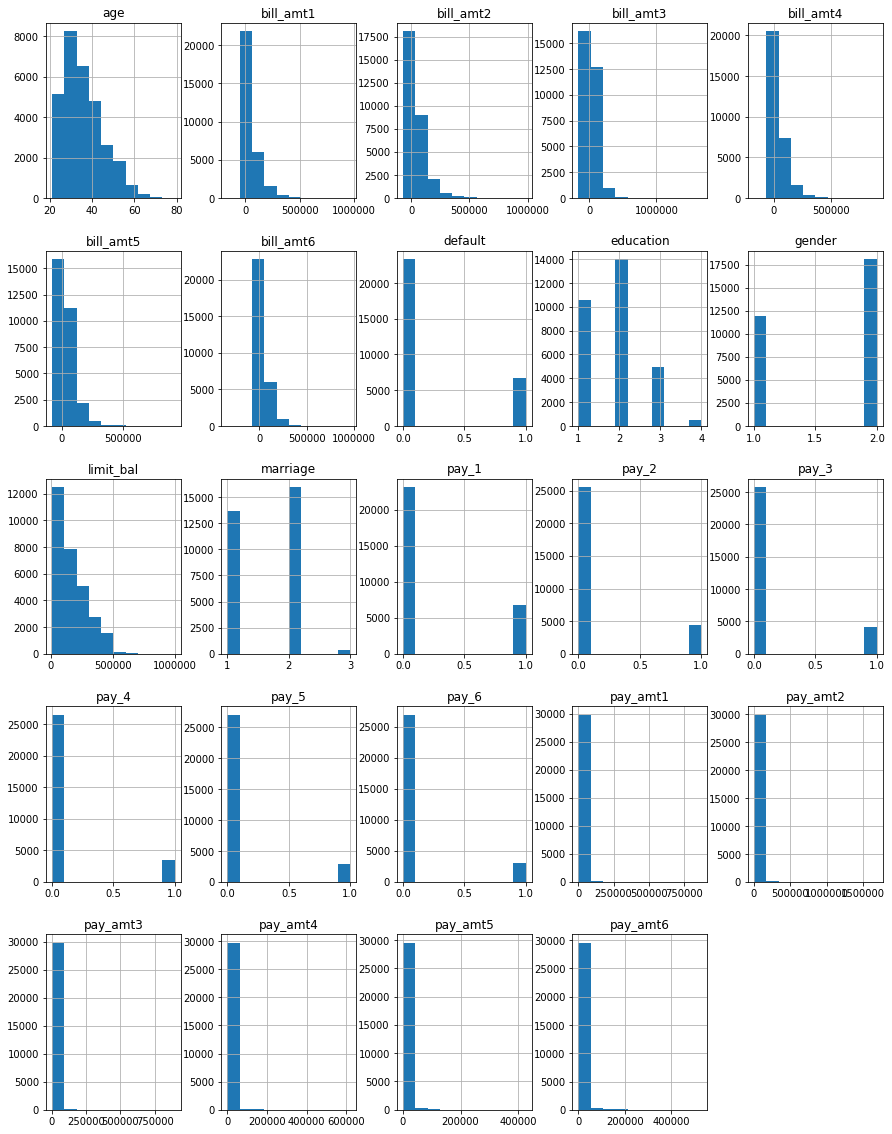

In [47]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.plot()

In [48]:
df

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,0,0,0,0,0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,1,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,0,0,0,0,0,0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


### pay_amt variables

In [49]:
df['pay_amt1'].describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: pay_amt1, dtype: float64

Weird how bit the payment amount range is !

Let's have a closer look at them :D

In [50]:
df[df['pay_amt1']>300000]

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
2687,500000.0,2,1,1,44,0,0,0,0,0,0,71921.0,367979.0,294969.0,189612.0,128459.0,167105.0,368199.0,6486.0,234.0,90.0,167116.0,372495.0,0
5687,480000.0,2,1,1,39,0,0,0,0,0,0,106660.0,400000.0,66270.0,80274.0,82160.0,110773.0,302000.0,66270.0,15000.0,3044.0,30042.0,34048.0,0
8500,400000.0,2,1,1,28,0,0,1,0,0,0,6500.0,405016.0,391178.0,392932.0,394410.0,410127.0,405016.0,0.0,14000.0,13560.0,28000.0,0.0,0
12330,300000.0,1,2,1,37,1,0,1,0,0,0,-165580.0,324392.0,296931.0,30355.0,26771.0,23737.0,505000.0,331.0,1070.0,17771.0,18000.0,16079.0,0
25431,170000.0,2,2,2,28,0,0,0,0,0,0,30860.0,167941.0,171459.0,173310.0,240738.0,135722.0,304815.0,8000.0,8127.0,4810.0,5000.0,5400.0,0
28003,510000.0,2,1,2,30,0,0,0,0,0,0,71121.0,481382.0,559712.0,163628.0,117475.0,116656.0,493358.0,1227082.0,164577.0,510.0,6239.0,4550.0,0
28716,340000.0,2,1,3,42,0,0,0,0,0,0,139808.0,176743.0,34402.0,205931.0,265431.0,270237.0,873552.0,1215471.0,889043.0,621000.0,20000.0,145000.0,0
29820,400000.0,1,2,2,37,1,0,0,0,0,0,396343.0,394858.0,395716.0,385947.0,305542.0,271385.0,423903.0,15100.0,14600.0,13000.0,9500.0,9500.0,0
29867,340000.0,1,1,2,29,0,0,0,0,0,0,44855.0,331641.0,331334.0,286660.0,263505.0,268256.0,300039.0,13214.0,12005.0,13005.0,10011.0,12005.0,0
29963,610000.0,1,1,2,31,0,0,1,0,0,0,348392.0,322228.0,319014.0,347303.0,248893.0,269528.0,323014.0,1605.0,349395.0,250144.0,271099.0,220076.0,0


WTF

**Pourquoi est-ce qu'il y a des montants négatifs dans bill_amt ???**

In [51]:
df[df['pay_amt2']>300000]

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
2592,480000.0,1,1,1,49,1,0,0,0,0,0,-220.0,38929.0,339176.0,33146.0,37337.0,33777.0,39149.0,344261.0,33312.0,37511.0,31383.0,10633.0,0
3774,500000.0,2,1,2,32,0,0,0,0,0,0,103880.0,39356.0,301441.0,37945.0,104491.0,35234.0,39560.0,302961.0,38139.0,104673.0,35387.0,177258.0,0
5296,500000.0,2,1,1,33,0,0,0,0,0,0,125.0,-18088.0,1664089.0,121757.0,97115.0,377217.0,4366.0,1684259.0,121831.0,97670.0,379267.0,26759.0,0
5400,500000.0,2,2,2,49,0,0,0,0,0,0,27891.0,8970.0,385228.0,391047.0,0.0,150.0,8982.0,385228.0,7821.0,0.0,150.0,363.0,0
6150,300000.0,2,3,2,39,1,0,0,0,0,0,-3928.0,-5973.0,4735.0,6186.0,116.0,14429.0,1720.0,344467.0,6822.0,49.0,15000.0,12000.0,1
6864,500000.0,1,1,2,30,0,0,0,0,0,0,192257.0,201402.0,444462.0,418237.0,424244.0,383145.0,40000.0,300018.0,15000.0,17000.0,15000.0,11100.0,0
9044,500000.0,2,1,1,36,0,0,0,0,0,0,51465.0,24201.0,384973.0,349790.0,315125.0,16576.0,24201.0,384986.0,7017.0,6342.0,16576.0,43710.0,0
11568,430000.0,1,2,1,46,0,0,0,0,0,0,52930.0,960.0,354716.0,361373.0,368484.0,365148.0,510.0,358689.0,15066.0,14126.0,13065.0,12908.0,1
11853,360000.0,1,3,1,34,1,1,0,0,0,0,277040.0,-22960.0,338600.0,22960.0,22960.0,0.0,0.0,361560.0,22960.0,0.0,0.0,0.0,0
12829,340000.0,1,2,2,44,0,0,0,0,0,0,327058.0,335584.0,330510.0,272220.0,269629.0,266723.0,16004.0,312723.0,9748.0,9800.0,9569.0,12500.0,1


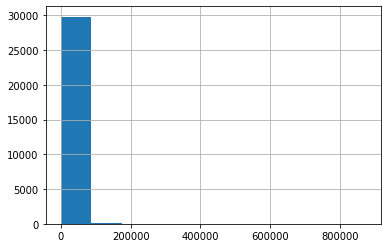

In [52]:
df['pay_amt1'].hist()

Let's have a look at correlations between features now!

## Correlation Study

### Between our features

In [55]:
corr = df.corr()

In [56]:
corr

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
limit_bal,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.157742,-0.199823,-0.194145,-0.185079,-0.173792,-0.171731,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
gender,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.024760,-0.040957,-0.038157,-0.035218,-0.033982,-0.027597,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
education,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.037227,0.060536,0.052776,0.050098,0.035713,0.023408,0.016597,0.011980,0.006714,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
marriage,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,-0.013798,-0.009931,0.000411,-0.005372,-0.004275,0.003197,-0.027832,-0.025294,-0.029082,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
age,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.003073,-0.009968,-0.015263,-0.007899,-0.016556,-0.020613,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
pay_1,-0.157742,-0.024760,0.037227,-0.013798,-0.003073,1.000000,0.668176,0.430527,0.371030,0.348587,0.309867,-0.056238,-0.045264,-0.037456,-0.027913,-0.018041,-0.017178,-0.087731,-0.058995,-0.070151,-0.066843,-0.068260,-0.064219,0.368117
pay_2,-0.199823,-0.040957,0.060536,-0.009931,-0.009968,0.668176,1.000000,0.625247,0.478977,0.443047,0.397391,0.005936,0.009481,0.017775,0.027209,0.035196,0.037593,-0.099439,-0.052395,-0.060111,-0.053905,-0.050965,-0.044745,0.338022
pay_3,-0.194145,-0.038157,0.052776,0.000411,-0.015263,0.430527,0.625247,1.000000,0.625660,0.482382,0.434247,-0.022620,-0.001617,0.001792,0.016869,0.026781,0.029806,-0.037844,-0.075793,-0.056923,-0.053084,-0.051506,-0.049673,0.293583
pay_4,-0.185079,-0.035218,0.050098,-0.005372,-0.007899,0.371030,0.478977,0.625660,1.000000,0.662637,0.496443,-0.020869,-0.007069,0.009373,0.022349,0.036032,0.042518,-0.054881,-0.037142,-0.077219,-0.054597,-0.053181,-0.048105,0.275495
pay_5,-0.173792,-0.033982,0.035713,-0.004275,-0.016556,0.348587,0.443047,0.482382,0.662637,1.000000,0.662683,-0.009427,0.001346,0.014253,0.037211,0.050441,0.057520,-0.054944,-0.040449,-0.036586,-0.068253,-0.051425,-0.045473,0.266959


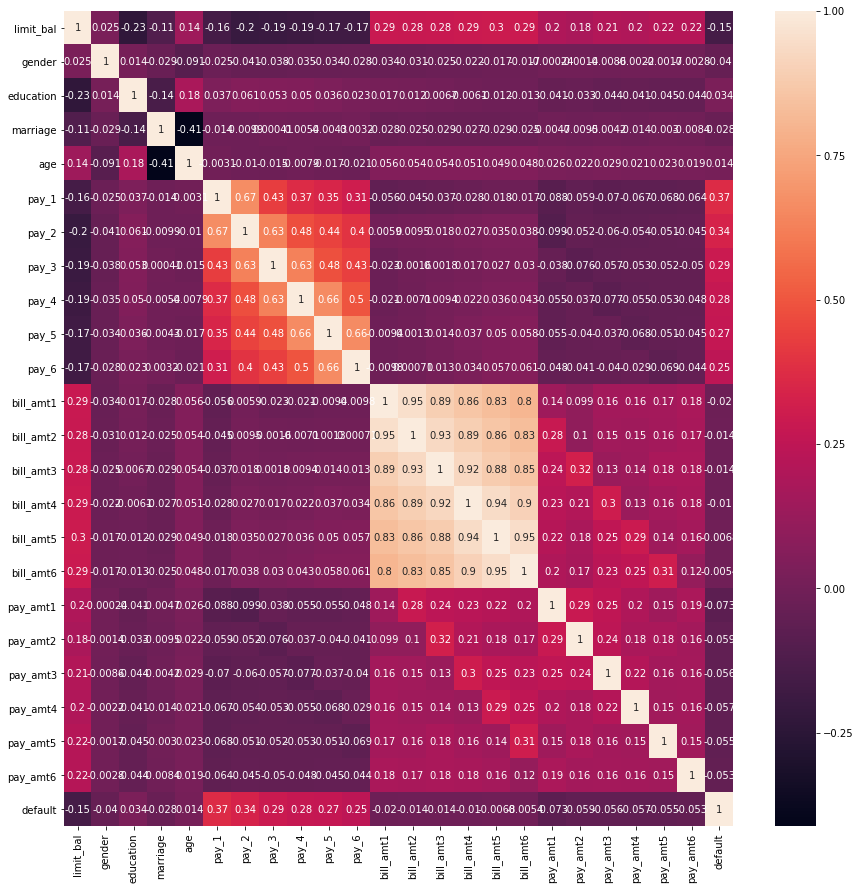

In [60]:
# plot the heatmap and annotation on it
plt.figure(figsize=(15, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

### Between a feature and the target

# Feature engineering

# Defining our models

# Training our models